# Guided Project: Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that [Fandango](https://www.fandango.com/)'s rating system was biased and dishonest. He published his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

In this project, we'll analyze recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

**UNDERSTANDIN THE DATA**

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis

In [1]:
#Import librairies

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data from 2015
fandango_15 = pd.read_csv('fandango_score_comparison.csv')
fandango_15.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
# Data from 2016 and 2017
fandango_16_17 = pd.read_csv('movie_ratings_16_17.csv')
fandango_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
# Isolate columns of interest
cols_1 = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
cols_2 = ['movie', 'year', 'fandango']

fand_15 = fandango_15[cols_1]
fand_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fand_16_17 = fandango_16_17[cols_2]
fand_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From the Hickey's article and the [README.md](https://github.com/fivethirtyeight/data/tree/master/fandango) file giving us information about how he conducted his analysis and the [README.md](https://github.com/mircealex/Movie_ratings_2016_17) file giving us information about movie ratings starting from 2016, we deduced that both data sets where not compiled randomly but to respond to certain questions in the mind of the people who gathered them. So those data sets might not be very useful for our goal.

**CHANGING THE GOAL OF OUR ANALYSIS**

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it. The latter seems much faster choice and more realistic because it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

One way we ould change the goal but still be fairly close to the old one is to redo a kinda same analysis Hickey did by comparing the score on Fandango site to other sites and see if fandango scores are still the odd ones. 

Another possibility is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

We will go the latter.

**ISOLATING THE SAMPLES WE NEED**

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

By popular, we mean movies having at least 30 fan ratings on Fandnago's website. In his analysis, Hickey used the same benchmark.

We know from the Hickey's analysis that the our fist data set from 2015 contains only popular movies. But, concerning the second one,  we only have the score in stars and no information about the number of ratings.

So, one quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [6]:
fand_16_17.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of March 2021, these are the fan ratings we found that most of those movies have ratings above 30. So we can move forward with our analysis.

We can also verified our earlier assumptions concerning the data set from 2015 to be sure we will not be working with bad data.

In [7]:
sum(fand_15['Fandango_votes'] < 30)

0

One last thing to do. We know the last data set contains movies released in 2016 and more.

In [8]:
sum(fand_16_17['year'] != 2016)

23

We need to make sure we only have movies released in 2016

In [9]:
fandango_2016 = fand_16_17[fand_16_17['year'] == 2016]
sum(fandango_2016['year'] != 2016)

0

Let's check if the data set from 2015 contains also movies from years different of 2015.

There's no special column for the releasing year, but we should be able to extract it from the strings in the FILM column.

In [10]:
fand_2015 = fand_15.copy()
fand_2015['year'] = fand_2015['FILM'].str[-5:-1].astype('int')
fand_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [11]:
# Check if there are years not 2015
sum(fand_2015['year'] != 2015)

17

Let's correct it.

In [12]:
fandango_2015 = fand_2015[fand_2015['year'] == 2015]
sum(fandango_2015['year'] != 2015)

0

**COMPARING DISTRIBUTION SHAPES FOR 2015 AND 2016**

We can now start analyzing the two samples we isolated before. 

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the FiveThirtyEight style for the plots.

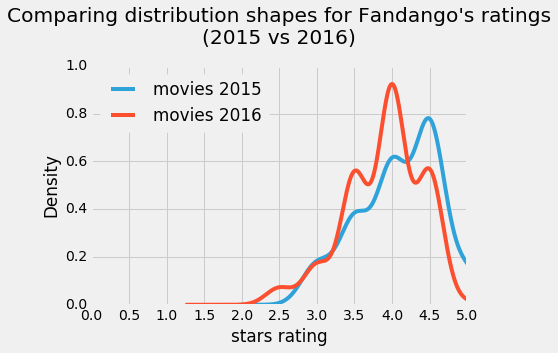

In [13]:
import numpy as np

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='movies 2015', legend=True)
fandango_2016['fandango'].plot.kde(label='movies 2016', legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('stars rating')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.show()

From the figure above, we see that both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

**COMPARING RELATIVE FREQUENCIES**

Now, we need to analyze more granular information. We will start by examining the frequency tables of the two distributions

In [14]:
print('- 2015 distribution\n')
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

- 2015 distribution



3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
print('- 2016 distribution\n')
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

- 2016 distribution



2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings.

**DETERMINING THE DIRECTION OF THE CHANGE**

The direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [16]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
# summary['stats'] = ['mean', 'median', 'mode']
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


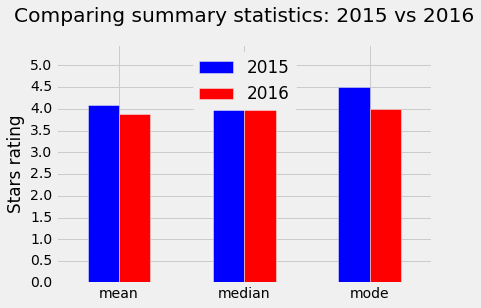

In [17]:
plt.style.use('fivethirtyeight')

# summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
# summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
#                          rot = 0, figsize = (8,5))

summary.plot.bar(rot=0, color=['blue', 'red'])

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars rating')
plt.legend(loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with approximately 0.2.

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

**CONCLUSION**

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.